In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import cm
from io import StringIO
import pandas as pd

In [2]:
mangaid = '1-269632'
nsa_z = 0.131457
BHMASS = []
plateifu = '9049-1901'

In [3]:
# open the file
data = fits.open('/Users/natachaupra/Downloads/manga-9049-1901-LOGCUBE.fits.gz')

In [4]:
# retrieve the flux density values
flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

In [5]:
# retrieve the ivar values
ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

In [6]:
# retrieve the mask values 
mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))

In [7]:
# retrieve the wave values 
wave = data['WAVE'].data

In [8]:
# sum flux density values element wise to get total flux density
n = len(flux)
sumflux = np.zeros(4563)
    
for i in range(n):
    for j in range(n):
        sumflux = np.add(sumflux, flux[i,j])

In [9]:
# check the redhsift
a = 5007 * (1 + nsa_z)

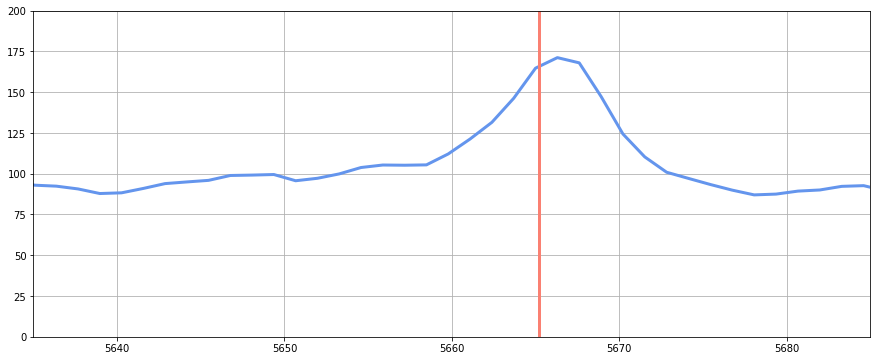

In [43]:
start = 5635
end = 5685
height = 200
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start, end)
plt.ylim(0,height)
plt.plot(wave, sumflux, linewidth = 3, color = 'cornflowerblue')
plt.axvline(a, linewidth = 3, color = 'salmon')

In [187]:
# select peak region
index = 0
yaxis = np.where(np.logical_and(wave > start, wave < end))[0]
# print(yaxis)
    
yaxis = yaxis[12:32]
print(yaxis)
print(len(yaxis))

# for i in yaxis:
#     print(wave[i])

[1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945
 1946 1947 1948 1949 1950 1951]
20


In [160]:
flux_compare = [] 
ivar_compare = []

for i in yaxis:
    flux_compare.append(flux[:,:,i].flatten())
    ivar_compare.append(ivar[:,:,i].flatten())

flux_compare = np.array(flux_compare)
ivar_compare = np.array(ivar_compare)

len(flux_compare[0]), len(ivar_compare)

(1024, 20)

In [161]:
result = []
sumresult = []

for i in range(len(yaxis)):
    for j in range(len(flux)**2):
        sigma = np.sqrt(1 / ivar_compare[i][j]) if ivar_compare[i][j] != 0 else 0
        
        if flux_compare[i][j] < (3 * sigma):
            result.append(0)
        else:
            result.append(flux_compare[i][j])
    sumresult.append(np.sum(result))
    result = []

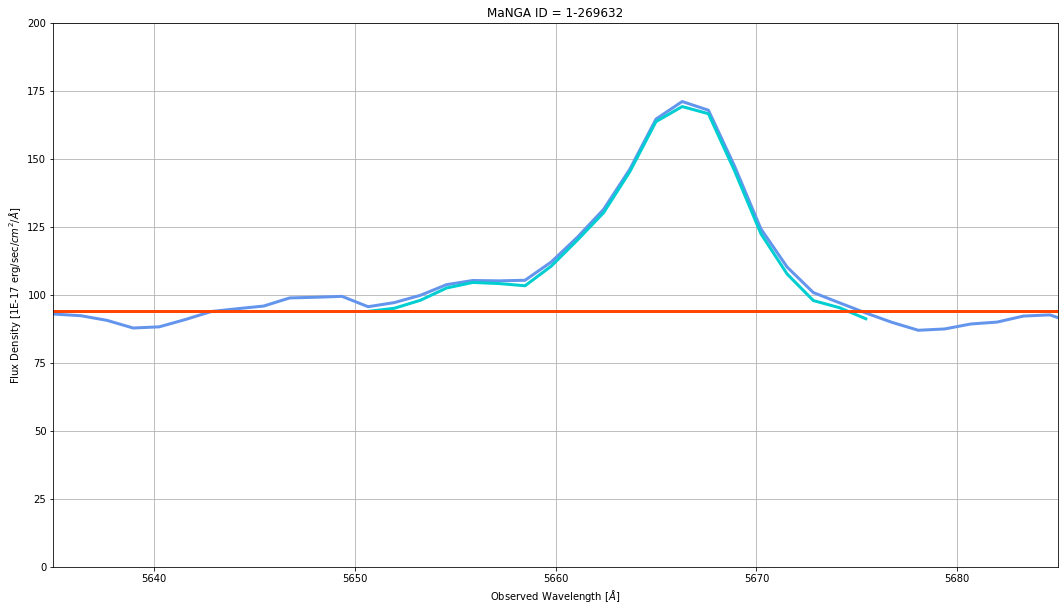

In [162]:
plt.figure(figsize = (18,10))
plt.grid()
plt.xlim(start, end)
plt.ylim(0,height)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

In [167]:
line1 = 5674
line2 = 5675.5
height1 = 90
height2 = 97

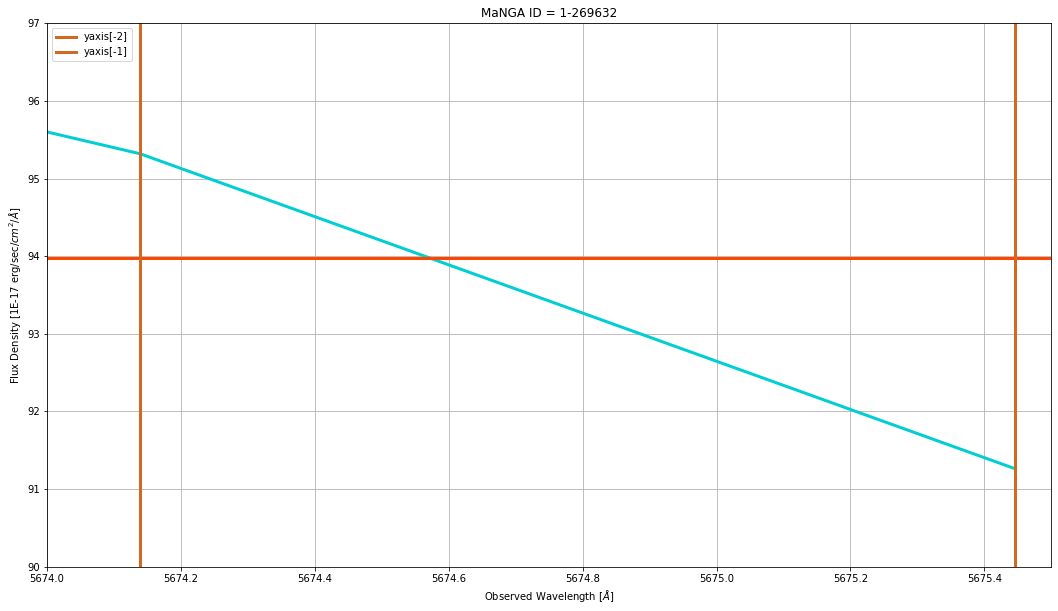

In [168]:
plt.figure(figsize = (18,10))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

plt.axvline(wave[yaxis[-2]], color = 'chocolate', linewidth = 3, label = 'yaxis[-2]')
plt.axvline(wave[yaxis[-1]], color = 'chocolate', linewidth = 3, label = 'yaxis[-1]')

plt.legend()
#1954 1955

In [169]:
index2 = np.where(yaxis == yaxis[-2])[0][0]
print(index2)
sumresult[index2]

18


95.31805121153593

In [170]:
# Get x and y of the both coordinates that define the line above 
x = [wave[yaxis[-2]], wave[yaxis[-1]]]
y = [sumresult[index2], sumresult[index2 + 1]]
print(x)
print(y)
print(sumresult[index2])

[5674.139384779082, 5675.446054085472]
[95.31805121153593, 91.26212428510189]
95.31805121153593


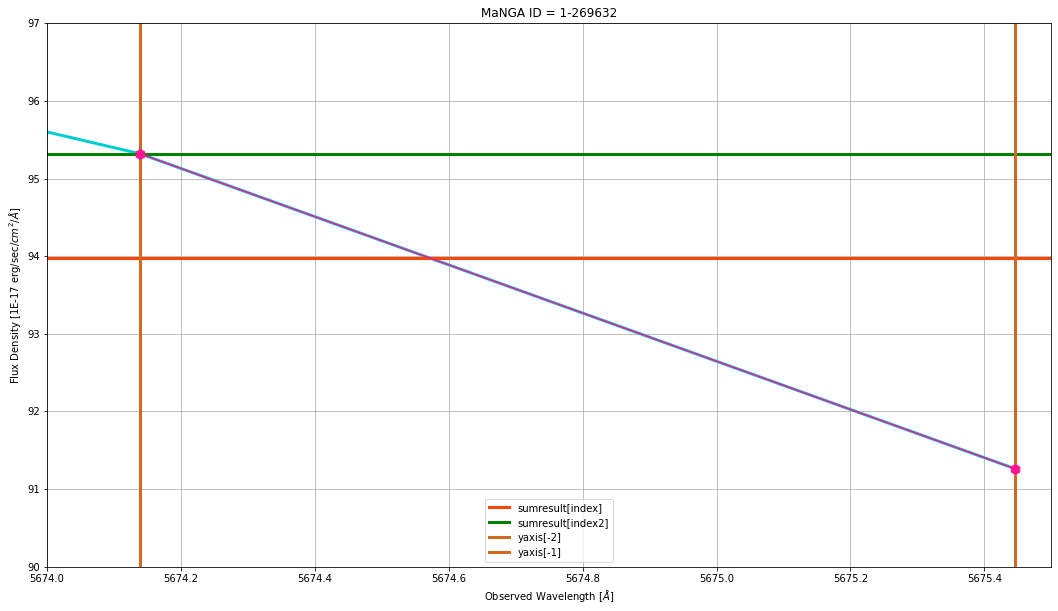

In [171]:
plt.figure(figsize = (18,10))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'sumresult[index]')
plt.axhline(sumresult[index2], linewidth = 3, color = 'green', label = 'sumresult[index2]')

plt.axvline(wave[yaxis[-2]], color = 'chocolate', linewidth = 3, label = 'yaxis[-2]')
plt.axvline(wave[yaxis[-1]], color = 'chocolate', linewidth = 3, label = 'yaxis[-1]')

plt.plot(x, y, marker = 'h', ms = 10, color = 'deeppink')



plt.legend()
#1954 1955

In [172]:
# Get the gradient of the line above 
m = (y[1] - y[0])/(x[1] - x[0])
m

-3.1040194382784003

In [173]:
# Get the y intercept of the line above 
c = y[0] - m*x[0]
c

17707.956997066853

In [174]:
# Define the function y = mx + c 
def func(y, m, c):
    print(y, m, c)
    x = (y - c)/m
    return x

In [175]:
xval = func(sumresult[index], m, c)
xval

93.97068157605827 -3.1040194382784003 17707.956997066853


5674.573457329938

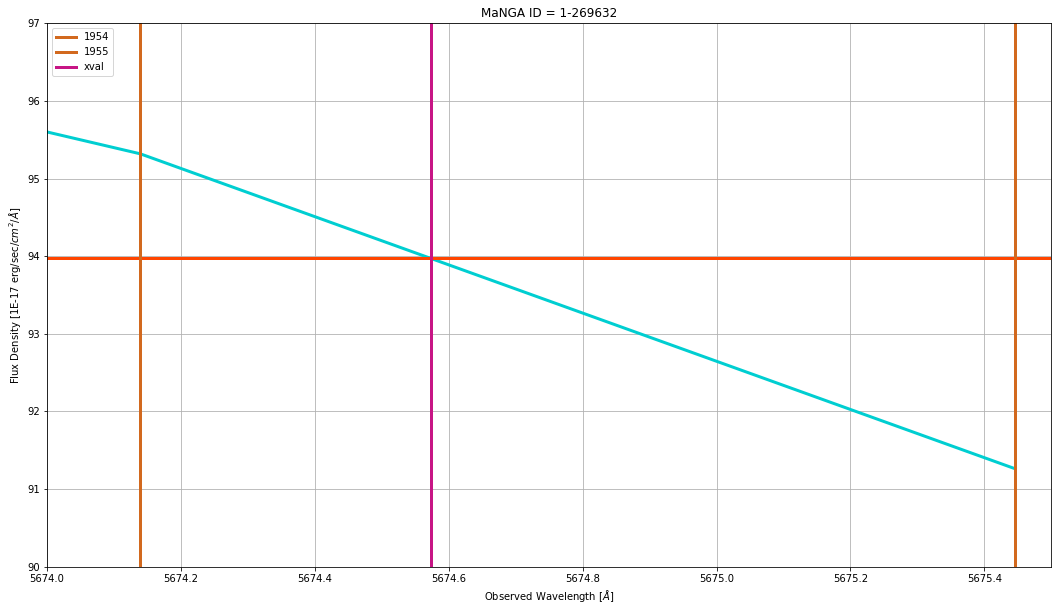

In [176]:
plt.figure(figsize = (18,10))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

plt.axvline(wave[yaxis[-2]], color = 'chocolate', linewidth = 3, label = '1954')
plt.axvline(wave[yaxis[-1]], color = 'chocolate', linewidth = 3, label = '1955')
plt.axvline(xval, color = 'mediumvioletred', linewidth = 3, label = 'xval')

plt.legend()
#1954 1955

In [177]:
xcoord = []
ycoord = []

for i in range(yaxis[0], yaxis[-1]):
    xcoord.append(wave[i])
    
xcoord.append(xval)
ycoord = sumresult[:-1]
ycoord.append(sumresult[index])
len(xcoord), len(sumresult), len(ycoord)

# print(xcoord[-1])
# print(sumresult[-1])
# print(sumresult[index])
# print(ycoord)

(20, 20, 20)

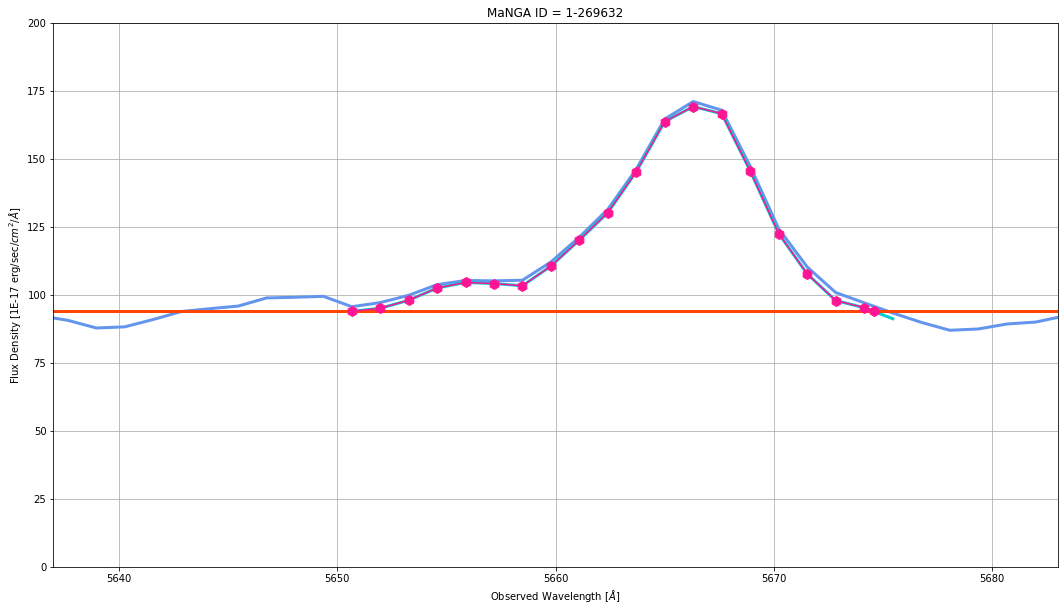

In [178]:
plt.figure(figsize = (18,10))
plt.grid()
plt.xlim(start+2, end-2)
plt.ylim(0,height)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

plt.plot(xcoord, ycoord, color = 'deeppink', marker = 'h', ms = 10)
# plt.plot(xcoord[-1], sumresult[index], marker = 'h', ms = 15, color = 'green')

In [179]:
dlmd = []
for i in range(len(xcoord)-1):
    dlmd.append(xcoord[i+1] - xcoord[i])

In [180]:
# Trapezium rule
# area = y_1 * h_1 + y_last * h_last + the in betweens 
area = ycoord[0] * dlmd[0] + ycoord[-1] * dlmd[-1]
# print(ycoord[0] * dlmd[0])
# print(ycoord[-1] * dlmd[-1])

for i in range(1, len(ycoord)-1):
#     print(i)
    area += ycoord[i] * (dlmd[i-1] + dlmd[i])

finalarea = (1/2) * area
finalarea

2887.389936234261

In [181]:
subtract = ycoord[0] * (xcoord[-1] - xcoord[0])
subtract

2246.157143039768

In [182]:
fluxarea = finalarea - subtract
fluxarea

641.2327931944928

In [183]:
def Mpc_to_cm(Mpc):
    return Mpc * 3.08568*(10**24)

def luminosity_calc(luminosity_distance, fluxarea):
    return 4 * np.pi * (luminosity_distance**2) * fluxarea * (1e-17)

def BH_calc(luminosity):
    return (3200 * luminosity) / (sol_luminosity * lmd_edd * 3.28 * (10**4))

nsa_z

0.131457

In [184]:
luminosity_distance = Mpc_to_cm(617.7)
luminosity = luminosity_calc(luminosity_distance, fluxarea)
print(luminosity_distance, 'cm', '/', luminosity, ('erg/s (?)'))

1.906024536e+27 cm / 2.9274033290082782e+41 erg/s (?)


In [185]:
sol_mass = 2 * (10**30)
lmd_edd = 1
sol_luminosity = 3.846 * 10**33

In [186]:
print('M_BH / M_sol =',BH_calc(luminosity))
print('log(luminosity) =',np.log10(luminosity))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity)))
print('log(luminosity / sol_lum) =', np.log10(luminosity / sol_luminosity))

M_BH / M_sol = 7425905.480532903
log(luminosity) = 41.466482562370715
log(M_BH / M_sol) = 6.870749417076481
log(luminosity / sol_lum) = 7.881473282468254
